## Initial Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Import time series data: Exchange Rate

In [4]:
data_exchange_rate = pd.read_csv('Source Data/exchange-rate-twi.csv')

## Build and evaulate time series forecast

### Splitting the data into train and test data

In [5]:
train_len = 212
train = data_exchange_rate[0:train_len]
test = data_exchange_rate[train_len:]

### Simple Average Method

In [6]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Exchange Rate TWI'].mean()
round(y_hat_avg,2)

,Month,Exchange Rate TWI,avg_forecast
212,213,52.5,88.33
213,214,53.1,88.33
214,215,53.8,88.33
215,216,55.2,88.33
216,217,58.9,88.33
...,...,...,...
299,300,49.6,88.33
300,301,48.5,88.33
301,302,48.4,88.33
302,303,51.0,88.33


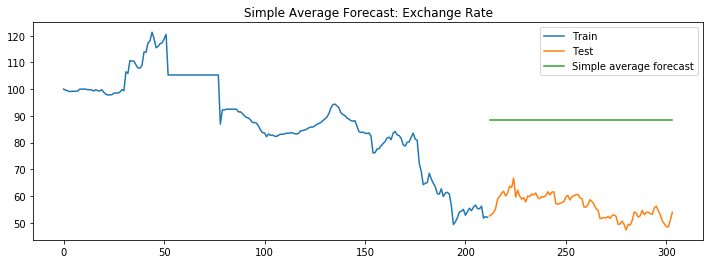

In [7]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label='Train')
plt.plot(test['Exchange Rate TWI'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Forecast: Exchange Rate')
plt.show()

### Calculating RMSE and MAPE - simple average method

In [8]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_avg['avg_forecast'])/test['Exchange Rate TWI'])*100,2)

results = pd.DataFrame({'Method': ['Simple Forecast Method'], 'RMSE': [rmse], 'MAPE': [mape]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Forecast Method,32.42,58.12


### Naive Method

In [9]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Exchange Rate TWI'][train_len-1]
y_hat_naive

,Month,Exchange Rate TWI,naive_forecast
212,213,52.5,52.0
213,214,53.1,52.0
214,215,53.8,52.0
215,216,55.2,52.0
216,217,58.9,52.0
...,...,...,...
299,300,49.6,52.0
300,301,48.5,52.0
301,302,48.4,52.0
302,303,51.0,52.0


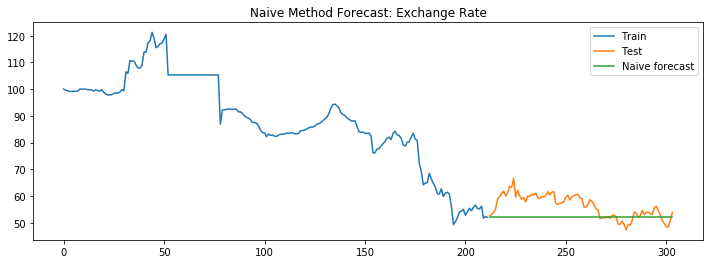

In [10]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label='Train')
plt.plot(test['Exchange Rate TWI'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method Forecast: Exchange Rate')
plt.show()

### Calculating RMSE and MAPE - naive method

In [11]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_naive['naive_forecast'])/test['Exchange Rate TWI'])*100,2)

tempResults = pd.DataFrame({'Method': ['Naive Method'], 'RMSE': [rmse], 'MAPE': [mape]})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Simple Forecast Method,32.42,58.12
0,Naive Method,5.98,8.41


### Simple Moving Average Method

In [12]:
y_hat_sma = data_exchange_rate.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = data_exchange_rate['Exchange Rate TWI'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

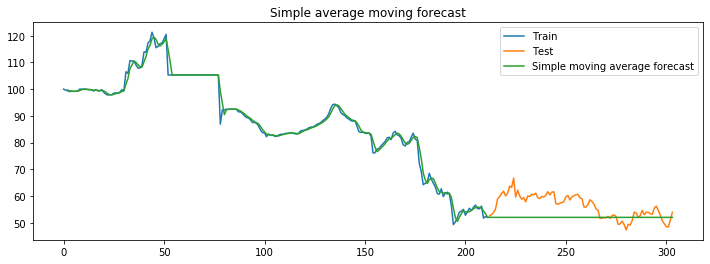

In [13]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label='Train')
plt.plot(test['Exchange Rate TWI'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple average moving forecast')
plt.show()

### Calculate RMSE and MAPE - simple moving average method

In [14]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_sma['sma_forecast'][train_len:])/test['Exchange Rate TWI'])*100,2)

tempResults = pd.DataFrame({'Method': ['Simple Average Moving Method(3 mths)'], 'RMSE': [rmse], 'MAPE': [mape]})
results = pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Simple Forecast Method,32.42,58.12
0,Naive Method,5.98,8.41
0,Simple Average Moving Method(3 mths),5.98,8.41


## Stationary vs non-stationary test series

### Time series plot

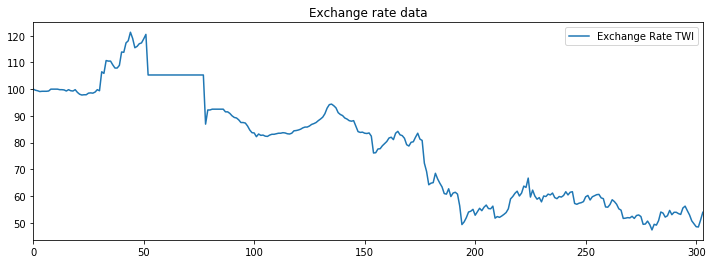

In [15]:
data_exchange_rate['Exchange Rate TWI'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Exchange rate data')
plt.show()

## Augumented Dickey-Fuller (ADF) Test

In [16]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data_exchange_rate['Exchange Rate TWI'])

print('ADF Statistics: %f' % adf_test[0])
print('Critical value @ 0.05 %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

# as p-value is greater than critical value. Hence, the series is not stationary.

ADF Statistics: -0.805468
Critical value @ 0.05 -2.87
p-value: 0.817511


## KPSS Test

In [18]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data_exchange_rate['Exchange Rate TWI'])

print('KPSS Statistics: %f' % kpss_test[0])
print('Critical value @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

# as p-value is less than critical value. Hence, the series is not stationary.

KPSS Statistics: 1.725897
Critical value @ 0.05: 0.46
p-value: 0.010000
